In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import xarray as xr
import string
import os
from lib import create_combination_subzones, create_nc_mask_NSEO,get_not_included_masks,find_neighbours
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
dir_fig = '../../../figures/'

In [84]:
dep_id = '34'
mask_sympo = True
mask_geographique = False
if mask_sympo and not mask_geographique: 
    fname_out = '../GeoData/zones_sympo_multiples/'+dep_id+'_mask_zones_sympos.nc'
    if not os.path.exists(fname_out): 
        dir_mask = '/home/mrpa/borderiesm/stageEMI/Codes/StageEMI/Masques_netcdf/ZONE_SYMPO/'
        list_subzones = glob.glob(dir_mask + dep_id +'*.nc')
        n_subzones = len(list_subzones)  # nombre de zones sympos initiales
        lst_subzones = [zone[-7:-3] for zone in list_subzones]
        ds_mask = create_combination_subzones(dir_mask,dep_id,lst_subzones,fname_out,degre5=True) 
        ds_mask = ds_mask.chunk({"id":1})
    else: 
        ds_mask = xr.open_dataset(fname_out,chunks={"id":1})

if mask_geographique and not mask_sympo: 
    if   dep_id == '38': dep = 'FRK24'
    elif dep_id == '41': dep = 'FRB05'
    elif dep_id == "34": dep = 'FRJ13'
    elif dep_id == '29': dep = "FRH02"
    else: 
        print('remplir la bonne valeur pour le dep')
        sys.exit()
    fname_out = '../GeoData/zones_sympo_multiples/'+ dep_id+'_'+dep+'_mask_NSEO.nc'
    if not os.path.exists(fname_out):
        dir_mask  = '../GeoData/nc_departement/'
        dep_file  = dir_mask + dep +'.nc' 
        print('on cree',fname_out)
        ds_mask = create_nc_mask_NSEO(dep_file,fname_out,plot_dep=False)
        ds_mask = ds_mask.chunk({"id":1})
    else:
        ds_mask = xr.open_dataset(fname_out,chunks={"id":1})
ds_mask.id.values.size

1257

# plot des différentes zones sympos

In [74]:
sys.exit()
fontsize = 18
plt.rc('font', size=fontsize)          # controls default text sizes
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels

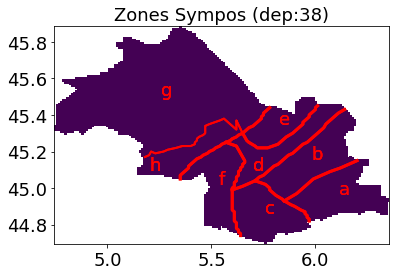

In [78]:

list_zones_sympos_initiales =[zone for zone in ds_mask.id.values if len(zone) == 4] ##[zone for zone in ds_mask.id.values if len(zone) == 4]
fig,ax = plt.subplots(nrows = 1, ncols=1)#,figsize  = (15,10))
X,Y = np.meshgrid( ds_mask.longitude.values.round(5),ds_mask.latitude.values.round(5))
legende = string.ascii_lowercase
ds_mask.sel(id='departement').mask.plot(ax=ax,add_colorbar=False)
for izone,zone_select in enumerate(list_zones_sympos_initiales) :
    mask_ref = ds_mask.sel(id = zone_select)
    listMasks  = [ds_mask.sel(id=id_ref) for id_ref in list_zones_sympos_initiales if zone_select != id_ref]
    list_neighbours = find_neighbours(mask_ref,listMasks)
#     print(list_neighbours)
    lst_mask_not_included, lst_mask_included = get_not_included_masks(mask_ref.mask, list_neighbours,ds_mask,flag_strictly_included=True)
    for neighbours in lst_mask_not_included:
        ind = np.where((mask_ref.mask.values == 1) & (ds_mask.sel(id=neighbours).mask.values == 1))
        Xf = X[ind]
        Yf = Y[ind]
        if (zone_select == '3807' and neighbours == '3808') or\
            (zone_select == '3808' and neighbours == '3807'):
                ax.plot(Xf[np.argsort(Xf)],Yf[np.argsort(Xf)],color='r',lw=2) #,ls='-.')
#                 print('caca')
        elif(zone_select == '3805' and neighbours == '3804') or\
            (zone_select == '3804' and neighbours == '3805'):
            ax.plot(Xf[np.argsort(Xf)],Yf[np.argsort(Xf)],color='r',lw=3)
        else: 
            ax.plot(Xf[np.argsort(Yf)],Yf[np.argsort(Yf)],color='r',lw=3) #,ls='-.')
        if izone == 3:
            Ylat,Xlat = 45.1,5.7
        elif izone == 7:
            Ylat,Xlat = 45.1,5.2
        else: 
            indice_mask_ref = np.where(mask_ref.mask.values == 1)
            Xlat,Ylat = X[indice_mask_ref].mean(),Y[indice_mask_ref].mean()
        ax.text(Xlat,Ylat,s=legende[izone],color='r',fontsize=18)
ax.set_title('Zones Sympos (dep:38)')        
ax.set_xlabel('')
ax.set_ylabel('')
fig.savefig(dir_fig+'zonage_sympos_'+dep_id+'.png',dpi=400)

In [47]:

Xf = np.unique(X[ind])
Yf = np.zeros(Xf.size)
for i,y in enumerate(Xf): 
    index = np.argmin(np.abs(X[ind] - y))
    Yf[i] = Y[ind][index]
Yf

array([45.05, 45.08, 45.09, 45.1 , 45.11, 45.13, 45.14, 45.15, 45.16,
       45.17, 45.18, 45.19, 45.2 , 45.21, 45.22, 45.23, 45.24, 45.25])

In [ ]:
sys.exit()

# plot simple du masque du département 

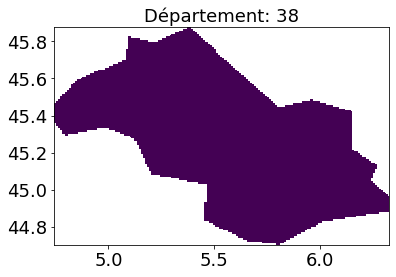

In [37]:
# plt.rcParams.update({'font.size': 18})
fontsize = 18
plt.rc('font', size=fontsize)          # controls default text sizes
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels

fig,ax = plt.subplots(nrows=1,ncols=1)
ds_mask.sel(id='departement').mask.plot(ax=ax,add_colorbar=False) #cbar_kwargs={'label':''})
ax.set_title(u'Département: {}'.format(dep_id))
ax.set_xlabel('')
ax.set_ylabel('')
fig.savefig(dir_fig+'zonage_geo_'+dep_id+'.png',dpi=400)

In [34]:
(0.9-0.12)/3*1 + 0.12


0.38